In [1]:
from imageai.Prediction import ImagePrediction
import os
import pandas as pd
import numpy as np
from PIL import Image
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

execution_path = os.getcwd()
TEST_PATH = '/home/guest/Documents/Aikomi'

prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "/home/guest/Documents/Test1/ImageAI-master/imageai/Prediction/Weights/DenseNet.h5"))
prediction.loadModel()

pred_array = np.empty((0,6),dtype=object)
for img in os.listdir(TEST_PATH):
    if img.endswith('.jpg'):
        image = Image.open(os.path.join(TEST_PATH, img))
        image = image.convert("RGB")
        image = np.array(image, dtype=np.uint8)
        predictions, probabilities = prediction.predictImage(os.path.join(TEST_PATH, img), result_count=5)
        temprow = np.zeros((1,pred_array.shape[1]),dtype=object)
        temprow[0,0] = img
        for i in range(len(predictions)):
            temprow[0,i+1] = predictions[i]
        pred_array = np.append(pred_array,temprow,axis=0)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
all_tags = pred_array[:,1:2].reshape(1,-1).tolist()
_in_sent = ' '.join(list(map(str,all_tags)))

#Storing image_name along with labels
mappings = []
for i in pred_array:
    for j in range(1):
        mappings.append([i[0],i[j+1]])

#Word2vec Model to generate vector values
model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
words = list(model.wv.vocab)
vector = list()
for word in words:
    vector.append(model[word])
X = model[model.wv.vocab]
model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
words = list(model.wv.vocab)
vector = list()
for word in words:
    vector.append(model[word])
    
#Storing image name
image_name = []
for i in range(len(vector)):
    image_name.append(mappings[i][0])

#Plotting the vector values in the plane
Xaxis = list()
yaxis = list()
myarray = np.reshape(vector[:(np.shape(vector)[0])], 2*(np.shape(vector)[0]))
for loop1 in range(2*(np.shape(vector)[0])):
    if(loop1%2 ==0):
        Xaxis.append(myarray[loop1])
    else:
        yaxis.append(myarray[loop1])
X = np.vstack((Xaxis, yaxis)).T

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


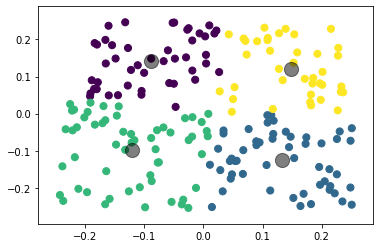

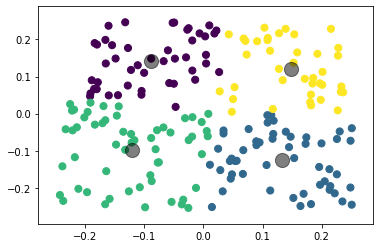

In [13]:
#KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list(image_name))
c = np.random.randint(1,5,size=522)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(X[:,0], X[:,1],c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([image_name[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [14]:
cluster_center = list()
for center in range(len(X)):
    cluster_center.append(y_kmeans[center])
tag_cluster = pd.DataFrame({'cluster_center': cluster_center,'image_tags': words })
mappings = {k:v for k,v in zip(words, image_name)}
tag_cluster['image_name'] = pd.Series([mappings[i] for i in tag_cluster.image_tags])
#df_cluster1 = tag_cluster[tag_cluster['cluster_center']==0]
#df_cluster2 = tag_cluster[tag_cluster['cluster_center']==1]
#df_cluster3 = tag_cluster[tag_cluster['cluster_center']==2]
#df_cluster4 = tag_cluster[tag_cluster['cluster_center']==3]
tag_cluster [:7]

,cluster_center,image_tags,image_name
0,1,cliff,1542714408912-download _1_.jpg
1,1,custard_apple,1542851180896-Fruit-grape.jpg
2,1,Great_Dane,1545035148538-edited_21. Hokusai_Under the Wav...
3,3,zucchini,1543934470142-edited_cucumbers.jpg
4,2,lighter,1546173537626-edited_10. Sapporo_Mitsukoshi de...
5,1,seashore,1544766986106-0817wallpaper-5_1600.jpg
6,2,Bouvier_des_Flandres,1545034887399-edited_18. Seurat_Oil Sketch for...


# TNSE

In [16]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, random_state=0)

# The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
# Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values
# can result in significanlty different results.
tsne_obj= tsne.fit_transform(X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cluster':tag_cluster['cluster_center']})
tsne_df.head()

,X,Y,cluster
0,-2.490527,4.614206,1
1,-2.393002,2.056993,1
2,-1.140724,3.065568,1
3,0.312964,4.262113,3
4,0.736217,-5.645581,2


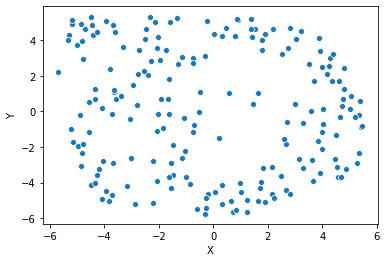

In [17]:
sns.scatterplot(x="X", y="Y",data=tsne_df);

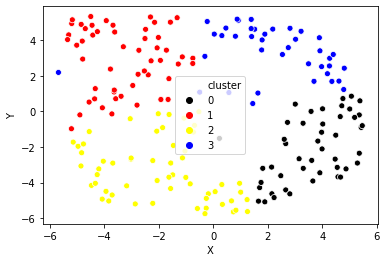

In [18]:
sns.scatterplot(x="X", y="Y",
              hue="cluster",
              palette=['black','red','yellow','blue'],
              legend='full',
              data=tsne_df);